In [1]:
import geopandas as gp
import pandas as pd
import os
#import json
#import pylab as pl
import zipfile
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### a) Combining the LL84 (2011) and the Pluto data extract variables that describe locational, structural, functional, and mechanical characteristics of NYC buildings)

In [2]:
#download energy data 
!curl -O 'https://data.cityofnewyork.us/api/views/q39e-7gbs/rows.csv?accessType=DOWNLOAD'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  441k    0  441k    0     0   468k      0 --:--:-- --:--:-- --:--:--  467k


In [3]:
nrg = gp.GeoDataFrame.from_csv('rows.csv?accessType=DOWNLOAD')

In [4]:
#download Bronx pluto data 
if not os.path.exists('bx'):
    os.makedirs('bx') 
    
if not os.path.exists('bx/bx_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bx_mappluto_16v2.zip'
    os.system("mv bx_mappluto_16v2.zip bx")
    
if not os.path.exists('bx/BXMapPLUTO.shp'):    
    zf = zipfile.ZipFile('bx/' + 'bx_mappluto_16v2.zip')
    zf.extractall("bx")
    zf.close


In [5]:
#download Brooklyn pluto data 
if not os.path.exists('bk'):
    os.makedirs('bk') 
    
if not os.path.exists('bk/bk_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bk_mappluto_16v2.zip'
    os.system("mv bk_mappluto_16v2.zip bk")
    
if not os.path.exists('bk/BKMapPLUTO.shp'):    
    zf = zipfile.ZipFile('bk/' + 'bk_mappluto_16v2.zip')
    zf.extractall("bk")
    zf.close

In [6]:
#download Manhattan pluto data 
if not os.path.exists('mn'):
    os.makedirs('mn') 
    
if not os.path.exists('mn/mn_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip'
    os.system("mv mn_mappluto_16v2.zip mn")
    
if not os.path.exists('mn/MNMapPLUTO.shp'):    
    zf = zipfile.ZipFile('mn/' + 'mn_mappluto_16v2.zip')
    zf.extractall("mn")
    zf.close

In [7]:
#download Queens pluto data 
if not os.path.exists('qn'):
    os.makedirs('qn') 
    
if not os.path.exists('qn/qn_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/qn_mappluto_16v2.zip'
    os.system("mv qn_mappluto_16v2.zip qn")
    
if not os.path.exists('qn/BKMapPLUTO.shp'):    
    zf = zipfile.ZipFile('qn/' + 'qn_mappluto_16v2.zip')
    zf.extractall("qn")
    zf.close

In [8]:
#download Staten Island pluto data 
if not os.path.exists('si'):
    os.makedirs('si') 
    
if not os.path.exists('si/si_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/si_mappluto_16v2.zip'
    os.system("mv si_mappluto_16v2.zip si")
    
if not os.path.exists('si/BKMapPLUTO.shp'):    
    zf = zipfile.ZipFile('si/' + 'si_mappluto_16v2.zip')
    zf.extractall("si")
    zf.close

In [ ]:
#read in files
P_bx = gp.read_file('bx/BXMapPLUTO.shp')
P_bk = gp.read_file('bk/BKMapPLUTO.shp')
P_mn = gp.read_file('mn/MNMapPLUTO.shp')
P_qn = gp.read_file('qn/QNMapPLUTO.shp')
P_si = gp.read_file('si/SIMapPLUTO.shp')

In [45]:
#Columns
P_bx.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AreaSource',
       u'AssessLand',  u'AssessTot',        u'BBL',   u'BldgArea',
        u'BldgClass',  u'BldgDepth',  u'BldgFront',      u'Block',
         u'BoroCode',    u'Borough',   u'BsmtCode',   u'BuiltFAR',
           u'CB2010',         u'CD',     u'CT2010',    u'ComArea',
          u'CommFAR',    u'CondoNo',    u'Council',  u'EDesigNum',
        u'Easements', u'ExemptLand',  u'ExemptTot',        u'Ext',
         u'FacilFAR', u'FactryArea',   u'FireComp', u'GarageArea',
       u'HealthArea',   u'HistDist', u'IrrLotCode',    u'LandUse',
         u'Landmark',        u'Lot',    u'LotArea',   u'LotDepth',
         u'LotFront',    u'LotType',  u'LtdHeight', u'MAPPLUTO_F',
         u'NumBldgs',  u'NumFloors', u'OfficeArea',  u'OtherArea',
         u'Overlay1',   u'Overlay2',  u'OwnerName',  u'OwnerType',
       u'PLUTOMapID', u'PolicePrct',   u'ProxCode',    u'ResArea',
         u'ResidFAR', u'RetailArea', u'SHAPE_Area', u'SHAPE_Le

In [67]:
nrg['BBL'] = nrg.index

In [91]:
nrg.columns

Index([u'Street Number', u'Street Name', u'Borough', u'Zip',
       u'Benchmarking Submission', u'Entry Number', u'Site EUI',
       u'Weather Normalized Source EUI', u'Water per Square Foot',
       u'ENERGY STAR Score', u'GHG', u'Reported Building Square Footage',
       u'Reported Facility Type', u'Number of Buildings', u'Reported BINs',
       u'BBL'],
      dtype='object')

In [145]:
nrg_1 = nrg[['BBL', 'GHG', 'Site EUI']]
nrg_1.rename(columns={'Site EUI':'Site_EUI'}, 
           inplace=True)
nrg_1.head()

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,BBL,GHG,Site_EUI
BBL,,,
1000050010,1000050010,NaN,NaN
1000090001,1000090001,12077.53,157.9
1000090014,1000090014,4817.62,91.5
1000090029,1000090029,10190.38,137.2
1000100014,1000100014,NaN,NaN


In [66]:
#Extract characteristics from Pluto
C_bx = P_bx[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]
C_bk = P_bk[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]
C_mn = P_mn[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]
C_qn = P_qn[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]
C_si = P_si[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]


In [80]:
# Combine pluto files
Char_b = C_bx.append(C_bk)
Char_b = Char_b.append(C_mn)
Char_b = Char_b.append(C_qn)
Char_b = Char_b.append(C_si)

In [81]:
print(len(C_bx) + len(C_bk) + len(C_mn) + len(C_qn) + len(C_si) == len(Char_b))

True

In [171]:
# Merge
bblnrgdata = pd.merge(nrg_1, Char_b, how='inner', on=['BBL'])

In [166]:
bblnrgdata.head()

,BBL,GHG,Site_EUI,ZipCode,BldgArea,YearBuilt,LandUse
0,1000050010,NaN,NaN,10004,1016406,1969,05
1,1000090001,12077.53,157.9,10004,845018,1970,05
2,1000090014,4817.62,91.5,10004,544015,1987,05
3,1000090029,10190.38,137.2,10004,896956,1971,05
4,1000100014,NaN,NaN,10004,365792,1986,05


In [172]:
bblnrgdata['BBL'] = pd.to_numeric(bblnrgdata['BBL'], errors = 'coerce')
bblnrgdata['GHG'] = pd.to_numeric(bblnrgdata['GHG'], errors = 'coerce')
bblnrgdata['Site_EUI'] = pd.to_numeric(bblnrgdata['Site_EUI'], errors = 'coerce')
bblnrgdata['ZipCode'] = pd.to_numeric(bblnrgdata['ZipCode'], errors = 'coerce')
bblnrgdata['BldgArea'] = pd.to_numeric(bblnrgdata['BldgArea'], errors = 'coerce')
#bblnrgdata['YearBuilt'] = pd.to_numeric(bblnrgdata['YearBuilt'], errors = 'coerce')
bblnrgdata['LandUse'] = pd.to_numeric(bblnrgdata['LandUse'], errors = 'coerce')


In [173]:
#Get rid of the outliers like YearBuilt is 0 and Zipcode eqauls 0.
bblnrgdataCut = bblnrgdata[(bblnrgdata.Site_EUI > 1000) & (bblnrgdata.YearBuilt > 0) & 
                           (bblnrgdata.ZipCode > 0) & (bblnrgdata.GHG > 100) &
                          (bblnrgdata.BldgArea > 100)]



In [175]:
bblnrgdataCut['BldgAge'] = 2017 - bblnrgdataCut['YearBuilt']
bblnrgdataCut.drop(['YearBuilt'], axis = 1, inplace = True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1300a7d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11eaae750>]], dtype=object)

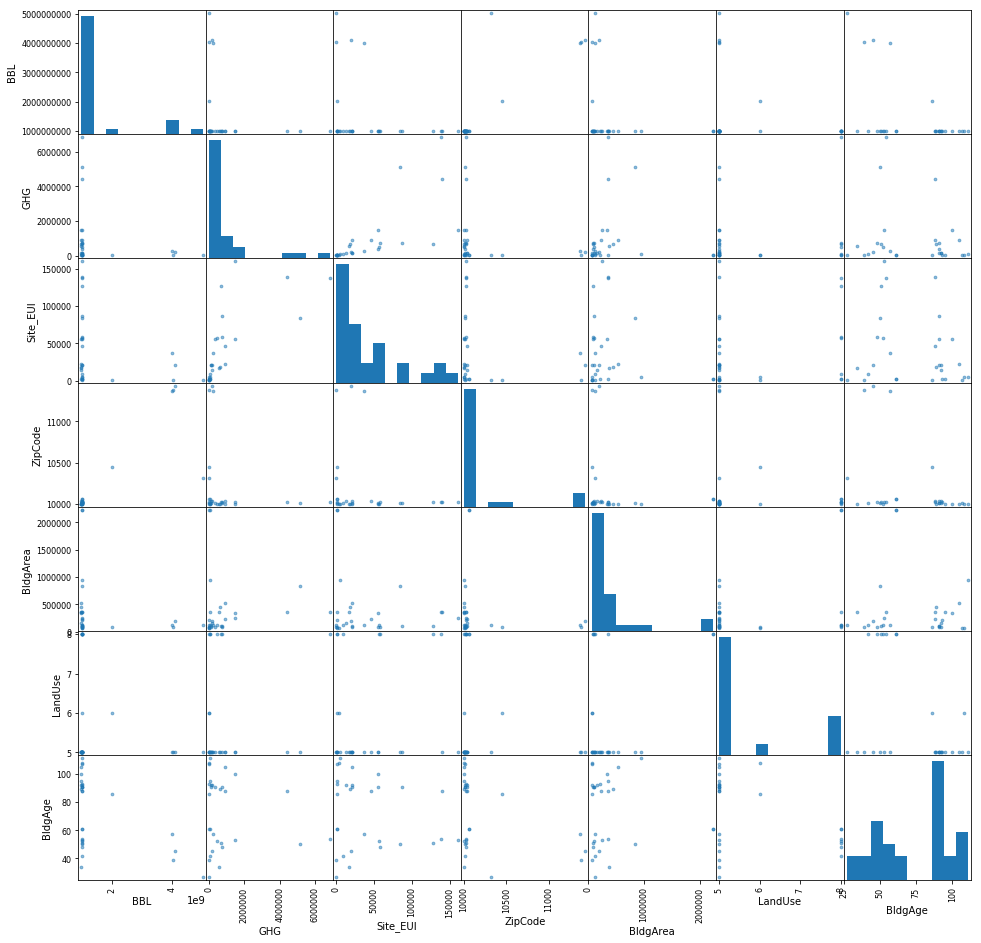

In [176]:
scatter_matrix (bblnrgdataCut, s=30, figsize=(16, 16))


In [178]:
lm = smf.ols(formula='Site_EUI ~ GHG + ZipCode + BldgArea + \
BldgAge + LandUse', data = bblnrgdataCut, missing='drop').fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Site_EUI   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     6.261
Date:                Fri, 24 Mar 2017   Prob (F-statistic):           0.000751
Time:                        22:17:52   Log-Likelihood:                -352.54
No. Observations:                  30   AIC:                             717.1
Df Residuals:                      24   BIC:                             725.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.039e+05   2.23e+05      0.912      0.371   -2.57e+05    6.65e+05
GHG            0.0189      0.004      4.630      0.000       0.010       0.027
ZipCode      -16.9336     18.718     -0.905      0.375     -55.565      21.697
BldgArea      -0.0217      0.013     -1.733      0.096      -0.047       0.004
BldgAge     -240.3613    328.519     -0.732      0.471    -918.391     437.669
LandUse     3144.5511   6340.701      0.496      0.624   -9942.013    1.62e+04
==============================================================================
Omnibus:                       16.223   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.128
Skew:                           1.499   Prob(JB):                     0.000116
Kurtosis:                       5.347   Cond. No.                     6.61e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
lm.summary?